In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'
# mb.models.Mubind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [3]:
df = mb.bindome.datasets.PBM.gcn4_dream_v11()
df = df.sort_values('intensity', ascending=False).reset_index(drop=True)
df = df[['seq', 'intensity']]
df.columns = ['seq', 0]

In [5]:
data = df.copy()
data[0] = np.log(data[0])
data[0] -= np.min(data[0])
data['seq'] = data['seq'].str[:-23]
data = data.set_index('seq')
dataset = mb.datasets.SelexDataset(data, n_rounds=0, enr_series=False)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [6]:
data

,0,batch
seq,,
CGCTGATAATGAGTCACACCTTGCCTTCCAGACAAAG,5.928542,0
TCCTGTGACTCATCCATACTCGAACATCCTTATGGAG,5.863594,0
CTAGTATGATGCTAACAGCATGATGACTCATACCGAG,5.816198,0
TTGCGTGGTCGTCGTATTGTATGACTCATGAATTTAG,5.782249,0
TGTGAGTGACTCATAGTAGATTGATTTGAAGGTTAAG,5.735554,0
...,...,...
CCGGGCTAAGAAAGGATGGAGCGCTAGTCCGGGTGCG,1.590431,0
AGAGCCATCAAGCTCCTATCTAGGACGGCCGAGCGCG,1.469345,0
GATGCAAGATAAAATAGATTCGGAGCTTCTAGAATGG,1.381920,0


# rounds 0
# batches 1
# enr_series False
next w 15 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0


before kernel optimization.


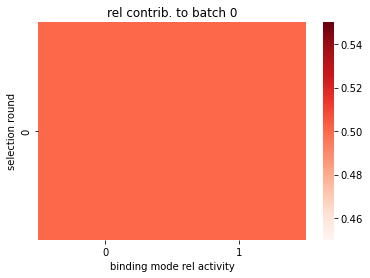


#activities
[[[1.]
  [1.]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


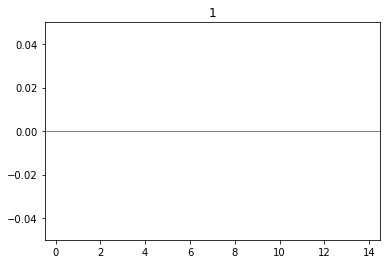

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


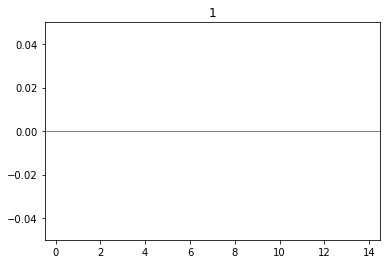

kernels mask [0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.232132 , best epoch: 1 secs per epoch: 1.101 s
Epoch: 17, Loss: 0.2323 , best epoch: 1 secs per epoch: 1.068 s
early stop!
total time: 17.093 s
secs per epoch: 1.068 s

##After kernel opt / before shift optim.


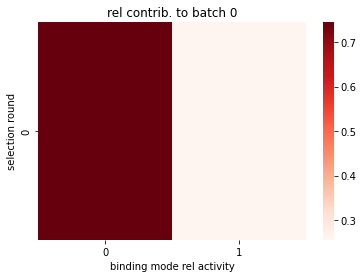


#activities
[[[2.917438]
  [1.      ]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


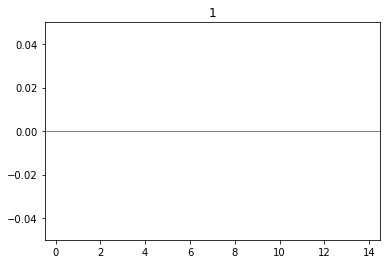

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


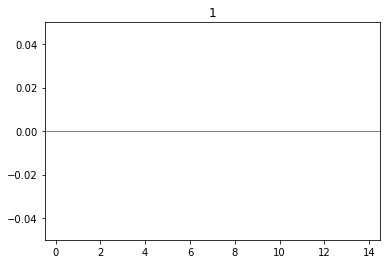

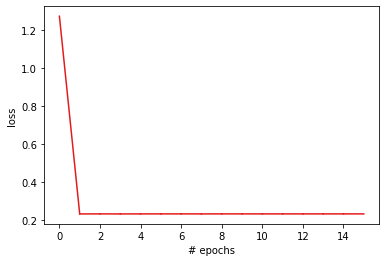

after shift optimz model


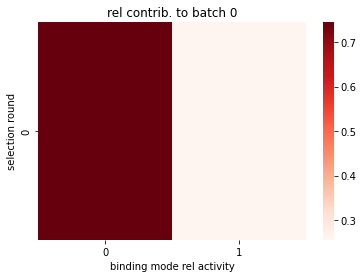

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])



#activities
[[[2.917438]
  [1.      ]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


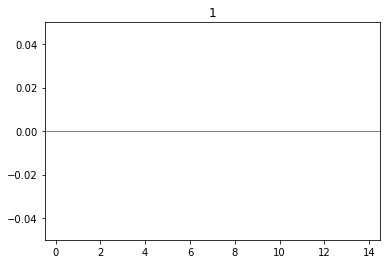

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


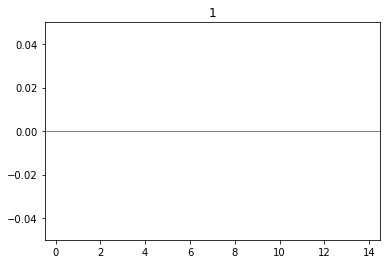

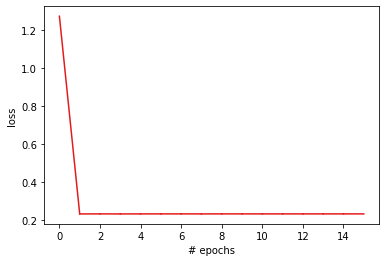



Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1


before kernel optimization.


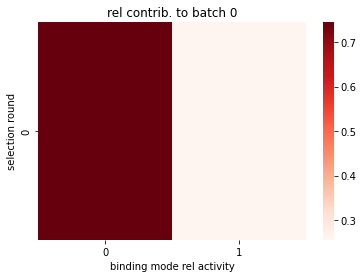

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])



#activities
[[[2.917438]
  [1.      ]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


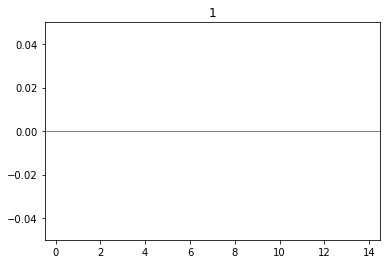

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


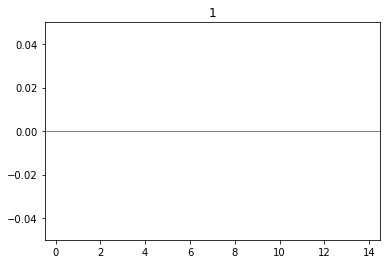

kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.961110 , best epoch: 9 secs per epoch: 1.539 s
Epoch: 21, Loss: 0.422996 , best epoch: 19 secs per epoch: 1.470 s
Epoch: 31, Loss: 0.301679 , best epoch: 29 secs per epoch: 1.456 s
Epoch: 41, Loss: 0.260383 , best epoch: 39 secs per epoch: 1.433 s
Epoch: 51, Loss: 0.244211 , best epoch: 49 secs per epoch: 1.432 s
Epoch: 61, Loss: 0.237280 , best epoch: 59 secs per epoch: 1.446 s
Epoch: 71, Loss: 0.234523 , best epoch: 69 secs per epoch: 1.443 s
Epoch: 81, Loss: 0.233244 , best epoch: 78 secs per epoch: 1.449 s
Epoch: 91, Loss: 0.232657 , best epoch: 89 secs per epoch: 1.451 s
total time: 143.128 s
secs per epoch: 1.446 s

##After kernel opt / before shift optim.


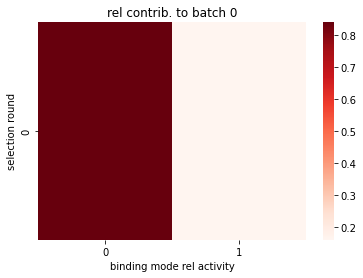


#activities
[[[2.917438 ]
  [0.5514877]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


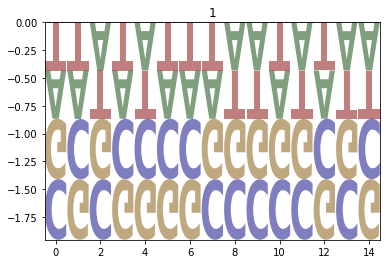

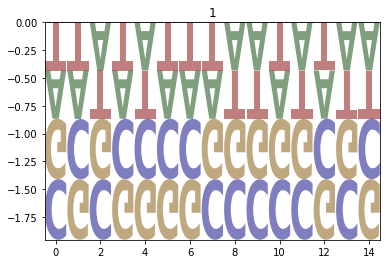

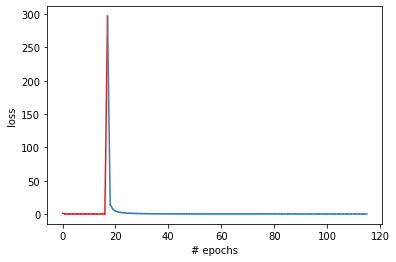


optimize_motif_shift (first)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.231390 , best epoch: 3 secs per epoch: 0.587 s
Epoch: 21, Loss: 0.165170 , best epoch: 19 secs per epoch: 0.562 s
Epoch: 31, Loss: 0.163796 , best epoch: 28 secs per epoch: 0.551 s
Epoch: 41, Loss: 0.163505 , best epoch: 35 secs per epoch: 0.545 s
Epoch: 51, Loss: 0.163541 , best epoch: 35 secs per epoch: 0.542 s
Epoch: 51, Loss: 0.1635 , best epoch: 35 secs per epoch: 0.542 s
early stop!
total time: 27.121 s
secs per epoch: 0.542 s
after opt.

#activities
[[[2.917438  ]
  [0.13476424]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


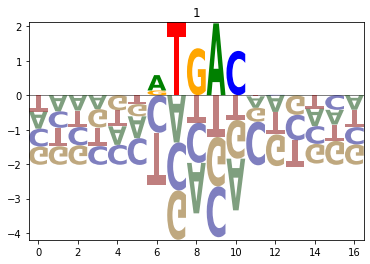

next expand left: 1, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.230741 , best epoch: 7 secs per epoch: 0.617 s
Epoch: 21, Loss: 0.164805 , best epoch: 19 secs per epoch: 0.591 s
Epoch: 31, Loss: 0.164290 , best epoch: 28 secs per epoch: 0.584 s
Epoch: 41, Loss: 0.164253 , best epoch: 28 secs per epoch: 0.572 s
Epoch: 44, Loss: 0.1641 , best epoch: 28 secs per epoch: 0.570 s
early stop!
total time: 24.501 s
secs per epoch: 0.570 s
after opt.

#activities
[[[2.917438  ]
  [0.14684696]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


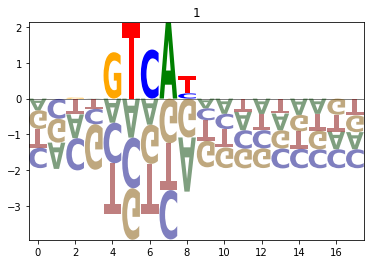

next expand left: 2, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.230947 , best epoch: 9 secs per epoch: 0.587 s
Epoch: 21, Loss: 0.164724 , best epoch: 18 secs per epoch: 0.569 s
Epoch: 31, Loss: 0.164006 , best epoch: 27 secs per epoch: 0.558 s
Epoch: 41, Loss: 0.164495 , best epoch: 27 secs per epoch: 0.555 s
Epoch: 43, Loss: 0.1642 , best epoch: 27 secs per epoch: 0.554 s
early stop!
total time: 23.278 s
secs per epoch: 0.554 s
after opt.

#activities
[[[2.917438  ]
  [0.14793105]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


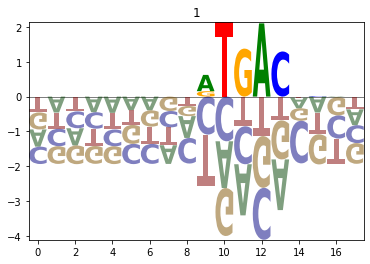

next expand left: 2, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.230863 , best epoch: 9 secs per epoch: 0.606 s
Epoch: 21, Loss: 0.164511 , best epoch: 19 secs per epoch: 0.586 s
Epoch: 31, Loss: 0.163430 , best epoch: 29 secs per epoch: 0.572 s
Epoch: 41, Loss: 0.163536 , best epoch: 39 secs per epoch: 0.571 s
Epoch: 51, Loss: 0.163138 , best epoch: 39 secs per epoch: 0.568 s
Epoch: 61, Loss: 0.163257 , best epoch: 55 secs per epoch: 0.564 s
Epoch: 71, Loss: 0.163378 , best epoch: 55 secs per epoch: 0.562 s
Epoch: 71, Loss: 0.1634 , best epoch: 55 secs per epoch: 0.562 s
early stop!
total time: 39.370 s
secs per epoch: 0.562 s
after opt.

#activities
[[[2.917438  ]
  [0.15700816]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


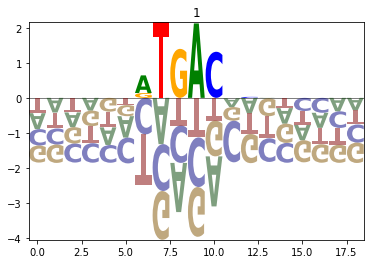

sorted
   expand.left  expand.right  shift      loss
0            2             2      0  0.163089
1            1             1      0  0.163406
2            2             1      0  0.163870
3            1             2      0  0.164061
4            0             0      0  0.232459
action: (2, 2, 0)


optimize_motif_shift (again)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.163089
action: (0, 0, 0)


optimize_motif_shift (first)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.163089
action: (0, 0, 0)

after shift optimz model


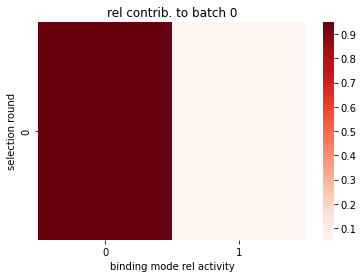


#activities
[[[2.917438  ]
  [0.15700816]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


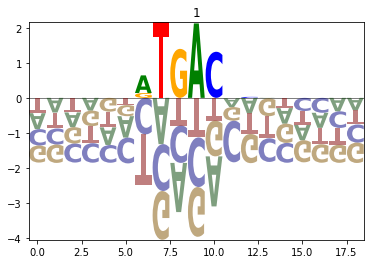

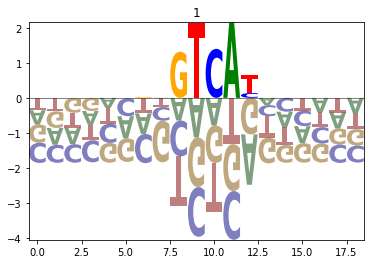

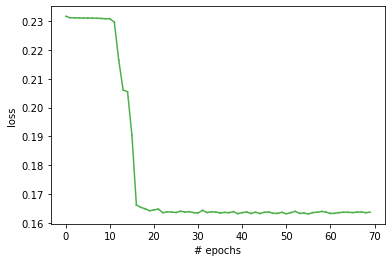




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 

kernels mask [0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 100 early_stopping 15
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 0.163452 , best epoch: 9 secs per epoch: 0.598 s
Epoch: 21, Loss: 0.163477 , best epoch: 9 secs per epoch: 0.568 s
Epoch: 25, Loss: 0.1631 , best epoch: 9 secs per epoch: 0.564 s
early stop!
total time: 13.540 s
secs per epoch: 0.564 s

##final motif signal (after final refinement)


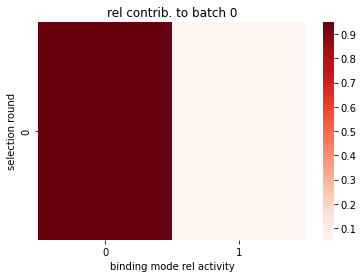


#activities
[[[2.917438  ]
  [0.15672286]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


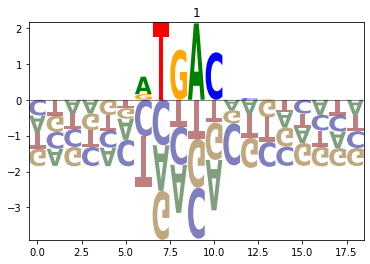

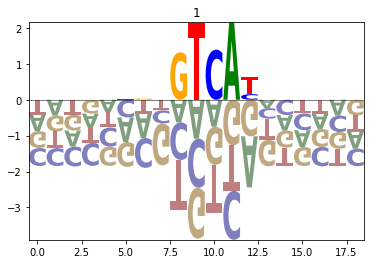

In [24]:
model, res = mb.tl.train_iterative(train, device, w=15, n_kernels=2, ignore_kernel=True, criterion=mb.tl.MSELoss(), datatype='pbm')

R^2: 0.6560216556192338


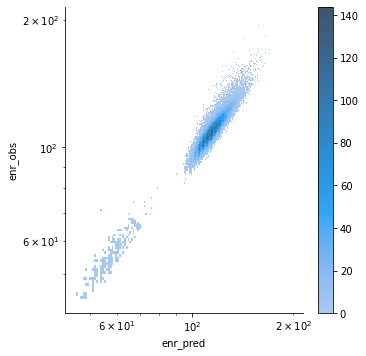

In [25]:
mb.pl.kmer_enrichment(model, train)

In [20]:
model = mb.models.Mubind(use_dinuc=False, kernels=[0, 14], n_rounds=0, n_batches=1, datatype='pbm').to(device)
l2 = []
optimiser = topti.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
criterion = mb.tl.MSELoss()

In [21]:
mb.tl.train_network(model, train, device, optimiser, criterion, num_epochs=500, early_stopping=10, log_each=10, verbose=2)

optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 500 early_stopping 10
lr= 0.001, weight_decay= 0.0001, dir weight= 0
Epoch: 11, Loss: 10.232148 , best epoch: 9 secs per epoch: 1.420 s
Epoch: 21, Loss: 1.167115 , best epoch: 19 secs per epoch: 1.349 s
Epoch: 31, Loss: 0.283492 , best epoch: 29 secs per epoch: 1.315 s
Epoch: 41, Loss: 0.233658 , best epoch: 39 secs per epoch: 1.279 s
Epoch: 51, Loss: 0.232160 , best epoch: 49 secs per epoch: 1.248 s
Epoch: 61, Loss: 0.229820 , best epoch: 59 secs per epoch: 1.235 s
Epoch: 71, Loss: 0.226511 , best epoch: 69 secs per epoch: 1.220 s
Epoch: 81, Loss: 0.223651 , best epoch: 79 secs per epoch: 1.209 s
Epoch: 91, Loss: 0.222225 , best epoch: 89 secs per epoch: 1.201 s
Epoch: 101, Loss: 0.219903 , best epoch: 99 secs per epoch: 1.190 s
Epoch: 111, Loss: 0.207857 , best epoch: 109 secs per epoch: 1.182 s
Epoch: 121, Loss: 0.173137 , best epoch: 119 secs per epoch: 1.178 s
Epoch: 131, Loss: 0.1530


#activities
[[[2.4867964 ]
  [0.62770444]]]

#log_etas
Parameter containing:
tensor([[0.]], requires_grad=True)


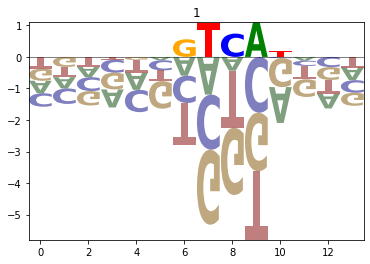

In [23]:
mb.pl.logo(model)

R^2: 0.9300106984298822


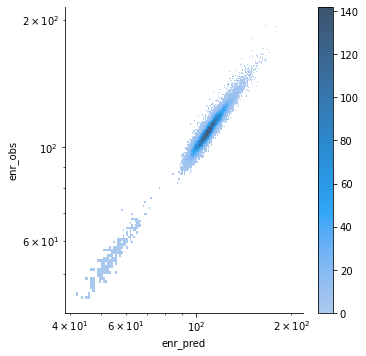

In [22]:
mb.pl.kmer_enrichment(model, train)